In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline
plt.rcParams['figure.figsize'] = (7,4)

34 47
dict_keys(['__header__', '__version__', '__globals__', 'sub_id', 'tc_rest_aal', 'tc_rest_power'])
(140, 116)
dict_keys(['__header__', '__version__', '__globals__', 'sub_id', 'tc_rest_aal', 'tc_rest_power'])
(140, 116)
[[[ -2.37586452e+01  -4.17574690e+01  -1.69819950e+01 ...,   2.12123481e+01
     1.70663595e+01   9.26863213e+01]
  [  8.51780998e+01   7.31324044e+01   2.75755737e+01 ...,  -2.30431710e+00
    -4.66608512e+00  -6.30142831e+01]
  [ -3.60015786e+01  -2.69436871e+01   7.50351261e+00 ...,   8.12439966e+00
    -5.20180855e+00  -2.77998958e+01]
  ..., 
  [ -3.46219426e+01   5.01818733e+01  -2.09614235e+01 ...,   1.20314558e+01
    -7.42176722e-01   1.78449935e+01]
  [ -4.29301800e+01   1.12517581e+01  -1.65616762e+01 ...,   1.47184626e+01
    -6.59832530e+00  -1.09083646e+01]
  [ -3.08118751e+01  -4.86097431e+01   3.31704700e+01 ...,   3.49076616e+01
     8.55761878e+00   1.26212831e+02]]

 [[ -7.04043806e+01  -7.42088587e+01   2.30400330e+01 ...,   1.34636356e+01
     3

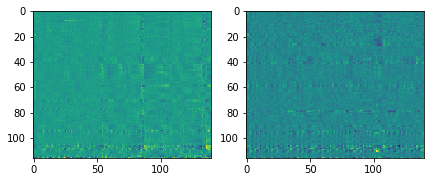

In [18]:
from os import listdir

names_c1 = listdir('./Neuro_dataset/Alzheimers_Subjects/')
names_c0 = listdir('./Neuro_dataset/Normal_Subjects/')

print(len(names_c1), len(names_c0))

# Experimental Check
data = loadmat('./Neuro_dataset/Alzheimers_Subjects/'+names_c1[0])
print(data.keys()) 
print(data['tc_rest_aal'].shape)
plt.subplot(121)
plt.imshow(data['tc_rest_aal'].T)

# Experimental Check normal subjects
data = loadmat('./Neuro_dataset/Normal_Subjects/'+names_c0[0])
print(data.keys())
print(data['tc_rest_aal'].shape)

plt.subplot(122)
plt.imshow(data['tc_rest_aal'].T)

X = []
y = []

for c1 in names_c1:
    data = loadmat('./Neuro_dataset/Alzheimers_Subjects/'+c1)
    X.append(data['tc_rest_aal'])
    y.append(1)
    
for c0 in names_c0:
    data = loadmat('./Neuro_dataset/Normal_Subjects/'+c0)
    X.append(data['tc_rest_aal'])
    y.append(0)

X = np.asarray(X)
y = np.asarray(y)

assert(X.shape == (len(names_c1)+len(names_c0), 140, 116))
assert(y.shape == (len(names_c1)+len(names_c0), ) )


### Description about Dataset

. Neuro Data set -- Binary Classification.
+ The data files are in directory Neuro_dataset. The data are .mat files.

+ The neuro dataset contains preprocessed and parcellated fMRI recordings of 34 Alzeimer's patients and 47 normal subjects in rest state. The number of training examples here is very small.
+ Once again data is not split into training and test sets. You need to decide how to learn and tes your learnt model.
+ Each 'pattern' here is an image with one dimension denoting time and the other dimension denoting brain-region in some quantized fashion (called parcellation).
    * Each mat file contains
        * sub_id : Subject Id
        * tc_rest_aal : 140 x 116 (time x Brain Region)
        * tc_rest_power: 140 x 264 (time x Brain Region)
<br/>
tc_rest_aal and tc_rest_power are two different parcellation of the same recordings.

**Learn with the 140 X 116 sized data. You can also explore the second data set and and see if you
can combine them to get better accuracy. While exploration of the smaller sized dataset is the
minimum you have to do,** <br/>
--exploring the other data set can get you extra bonus marks--
Use at least two different models. They can be either two sufficiently different neural network
models or an appropriate neural network model and an SVM.**

### Using Tensorflow

#### Neural Model 1

In [108]:
import tensorflow as tf
tf.__version__


'1.7.0'

https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

In [130]:
y_onehot = np.zeros((y.shape[0],2))
for i in range(y.shape[0]):
    y_onehot[i,y[i]] = 1

N, T, D = X.shape
    
nm_epochs = 3
n_classes = 2
batch_size = 10
chunk_size = D #(dimension of input vector)
n_chunks = T  #(time series data)
rnn_size = 50

In [134]:
X_tf = tf.placeholder(dtype=tf.float32, shape=[None, T, D])
y_tf = tf.placeholder(dtype=tf.float32)

In [ ]:
def recurrent_neural_network(X):
    layer = {'weights': tf.Variable(tf.random_normal([rnn_size, n_classes]))
             'biases': tf.Variable(tf.random_normal([n_classes]))
            }
    ## bring time series before such that T, N , D
    X = tf.transpose(X, [1,0,2])
    X = tf.reshape(X, [-1, chunk_size])
    X = tf.split(X, n_chunks, 0)

#### Neural Model 2 or SVM

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [101]:
X_svm = [np.ndarray.flatten(X[i,]) for i in range(X.shape[0])]
y_svm = y.copy()
X_svm = np.asarray(X_svm)

print(X_svm.shape)
print(y_svm.shape)
## Divide test and train dataset
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
X_svm, y_svm, test_size=0.33, random_state=0)

(81, 16240)
(81,)


In [102]:
clf = svm.SVC(C=1, kernel='rbf', tol=1e-5,
              decision_function_shape='ovr',
              max_iter=-1, random_state=0)

clf.fit(X_train_svm, y_train_svm)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

In [103]:
## train Accuracy
print('train accuracy = {:.3f}'.format(clf.score(X_train_svm, y_train_svm) ))

## Test Accuracy
print('test accuracy = {:.3f}'.format(clf.score(X_test_svm, y_test_svm)))

train accuracy = 1.000
test accuracy = 0.630


## Using keras

#### Neural Model 1

#### Neural Model 2 or SVM